In [1]:
import numpy as np
import numbapro
from numbapro import *
#%qtconsole

In [137]:
a=numbapro.cuda.get_current_device()

In [2]:
home = %env HOME

In [3]:
cd $home/QCThesis/CUDA/

/home/diogoaos/QCThesis/CUDA


# Generate data

In [111]:
from sklearn import datasets # generate gaussian mixture
from timeit import default_timer as timer # timing
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
##generate data
n = 2e6
d = 2
k = 20

n = np.int(n)

total_bytes = np.float((n * d + k * d + n * k) * 4)
print 'Memory used by arrays:\t',total_bytes/1024,'\tKBytes'
print '\t\t\t',total_bytes/(1024*1024),'\tMBytes'

print 'Memory used by data:  \t',n * d * 4 / 1024,'\t','KBytes'

Memory used by arrays:	171875.15625 	KBytes
			167.846832275 	MBytes
Memory used by data:  	15625 	KBytes


In [7]:
## Generate data
#data = np.random.random((n,d)).astype(np.float32)
data, groundTruth = datasets.make_blobs(n_samples=n,n_features=d,centers=k,
                                        center_box=(-1000.0,1000.0))
data = data.astype(np.float32)

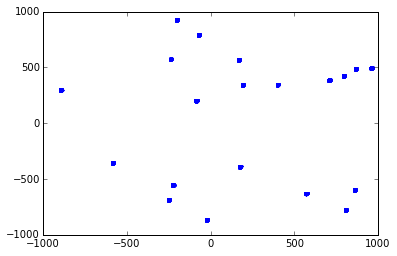

In [114]:
plt.plot(data[:,0],data[:,1],'.')

# Testing 3 iterations

In [ ]:
import K_Means2

In [ ]:
%qtconsole

In [ ]:
times=dict() #dicitonary to store times

start = timer()
grouperCUDA = K_Means()
grouperCUDA.fit(data,k,cuda=True,iters=3)
times['cuda'] = timer() - start

start = timer()
grouperNP = K_Means()
grouperNP.fit(data,k,cuda=False,iters=3)
times['numpy'] = timer() - start
#del grouperNP

print 'Times'
print 'CUDA','\t',times['cuda']
print 'NumPy','\t',times['numpy']

# K_Means3

In [21]:
import K_Means3
reload(K_Means3)
from K_Means3 import K_Means

In [36]:


times=dict() #dicitonary to store times
iters=100

start = timer()
grouperCUDA = K_Means()
grouperCUDA._centroid_mode = "index"
grouperCUDA.fit(data, k, iters=iters, mode="cuda", cuda_mem='manual',tol=1e-4,max_iters=300)
times['cuda'] = timer() - start

start = timer()
grouperCUDA2 = K_Means()
grouperCUDA2._centroid_mode = "index"
grouperCUDA2._cuda_mem="manual"
grouperCUDA2.fit(data, k, iters=iters, mode="cuda", cuda_mem='manual',tol=1e-4,max_iters=300)
times['cuda_man'] = timer() - start

start = timer()
grouperNP = K_Means()
grouperNP._centroid_mode = "index"
grouperNP.fit(data, k, iters=iters, mode="numpy", cuda_mem='manual',tol=1e-4,max_iters=300)
times['numpy'] = timer() - start


print 'Times'
print 'CUDA','\t',times['cuda']
print 'CUDA M','\t',times['cuda_man']
print 'NumPy','\t',times['numpy']

Times
CUDA 	30.8934261799
CUDA M 	29.8500869274
NumPy 	111.092539072


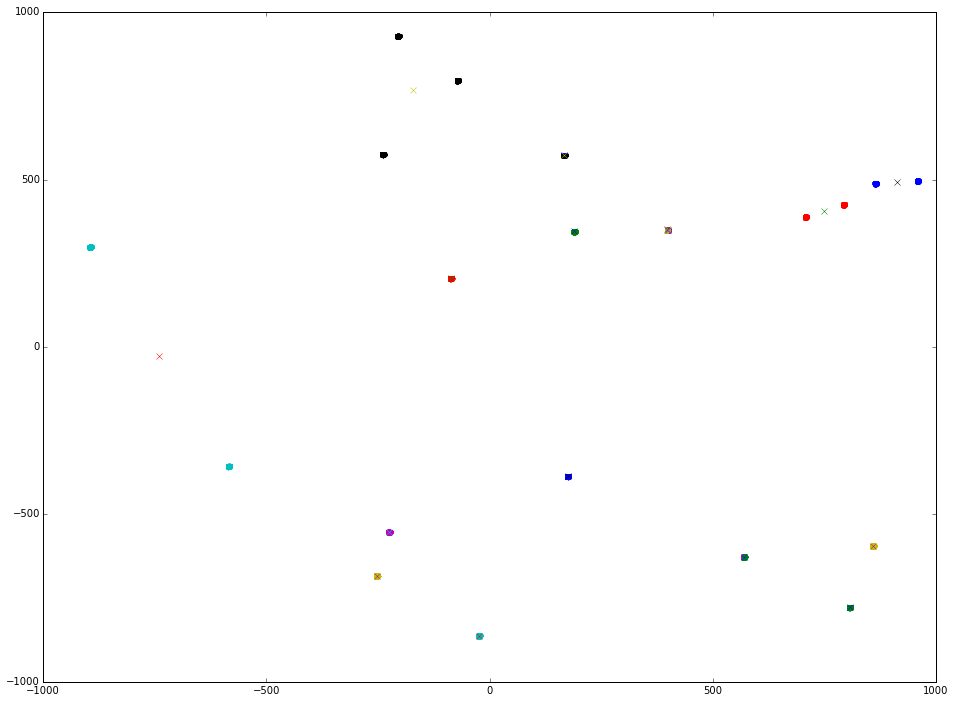

In [126]:
plt.figure(figsize=(16,12))
for c in grouperCUDA.partition:
    plt.plot(data[c,0],data[c,1],'.')
for c in grouperCUDA.centroids:
    plt.plot(c[0],c[1],'x')

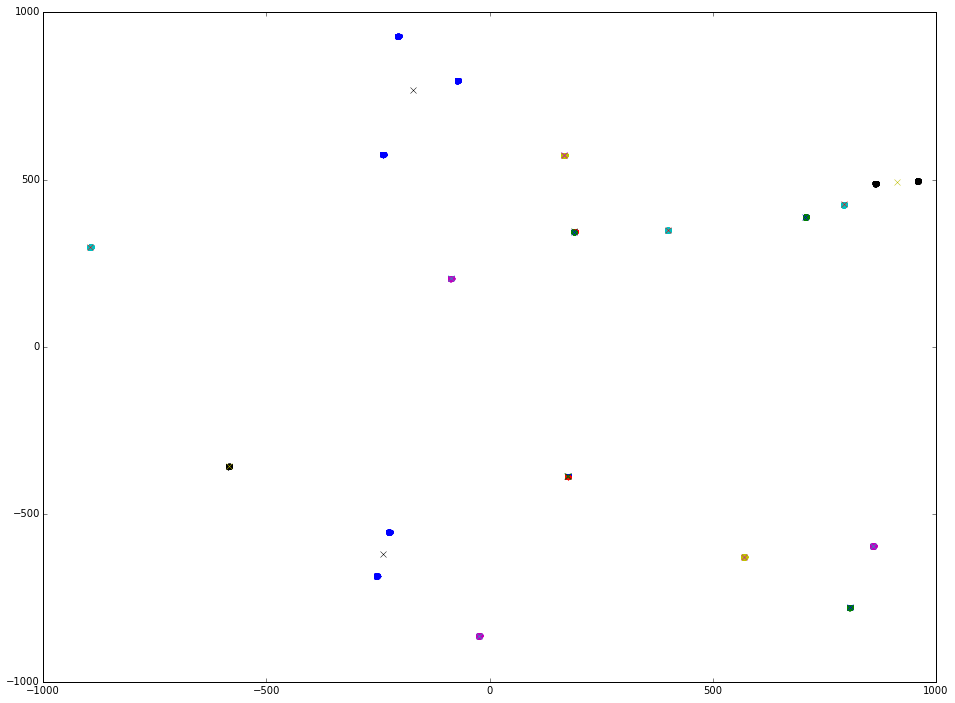

In [127]:
plt.figure(figsize=(16,12))
for c in grouperCUDA2.partition:
    plt.plot(data[c,0],data[c,1],'.')
for c in grouperCUDA2.centroids:
    plt.plot(c[0],c[1],'x')

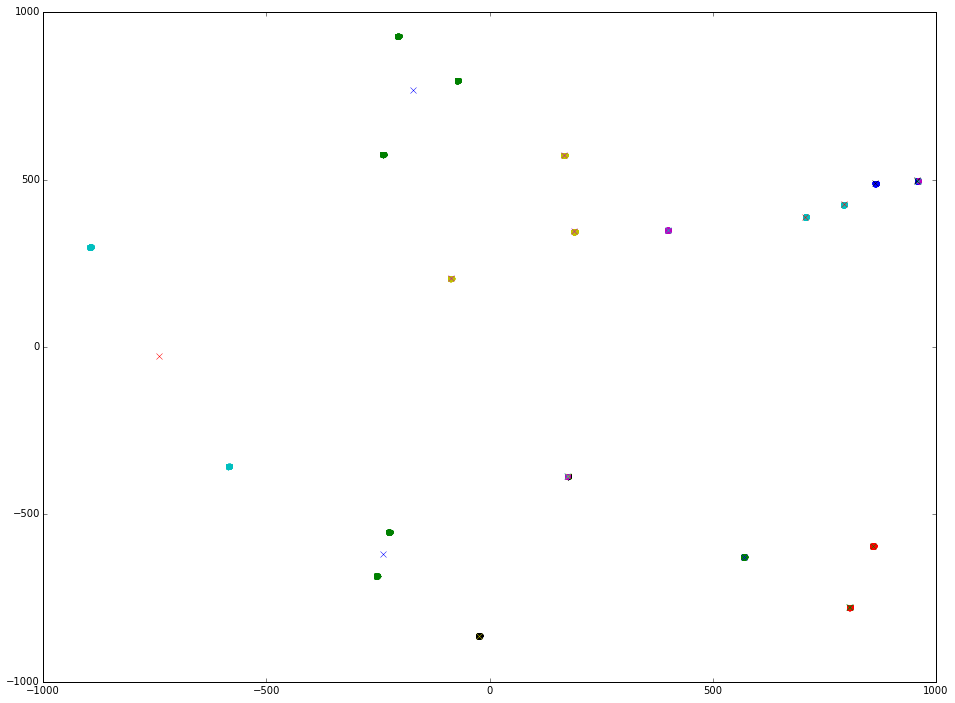

In [128]:
plt.figure(figsize=(16,12))
for c in grouperNP.partition:
    plt.plot(data[c,0],data[c,1],'.')
for c in grouperNP.centroids:
    plt.plot(c[0],c[1],'x')

In [56]:
import cProfile

In [58]:
cProfile.run("grouperCUDA.fit(data, k, iters=iters, mode=\"cuda\", cuda_mem='manual',tol=1e-4,max_iters=300)")

         93301 function calls in 31.461 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   31.461   31.461 <string>:1(<module>)
      300    0.000    0.000    0.001    0.000 <string>:8(__new__)
        1    0.000    0.000    0.000    0.000 K_Means3.py:108(_init_centroids)
      100    0.000    0.000   14.241    0.142 K_Means3.py:135(_label)
      100    0.001    0.000   14.240    0.142 K_Means3.py:263(_cu_label)
      100    0.001    0.000   14.240    0.142 K_Means3.py:341(_cu_label_kernel)
      100    0.000    0.000   17.219    0.172 K_Means3.py:500(_recompute_centroids)
        1    0.001    0.001   31.461   31.461 K_Means3.py:55(fit)
      100    6.583    0.066   17.219    0.172 K_Means3.py:560(_np_recompute_centroids_index)
      600    0.000    0.000    0.007    0.000 _methods.py:34(_prod)
     2000    0.001    0.000    0.006    0.000 _methods.py:37(_any)
      200    0.000    0.000    0.001

In [60]:
cProfile.run("grouperCUDA2.fit(data, k, iters=iters, mode=\"cuda\", cuda_mem='manual',tol=1e-4,max_iters=300)")

         79911 function calls in 30.316 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   30.316   30.316 <string>:1(<module>)
      200    0.000    0.000    0.000    0.000 <string>:8(__new__)
        1    0.000    0.000    0.000    0.000 K_Means3.py:108(_init_centroids)
      100    0.000    0.000   13.515    0.135 K_Means3.py:135(_label)
      100    0.002    0.000   13.514    0.135 K_Means3.py:263(_cu_label)
      100    0.001    0.000    0.020    0.000 K_Means3.py:341(_cu_label_kernel)
      100    0.000    0.000   16.800    0.168 K_Means3.py:500(_recompute_centroids)
        1    0.001    0.001   30.316   30.316 K_Means3.py:55(fit)
      100    6.334    0.063   16.800    0.168 K_Means3.py:560(_np_recompute_centroids_index)
      400    0.000    0.000    0.004    0.000 _methods.py:34(_prod)
     2000    0.001    0.000    0.006    0.000 _methods.py:37(_any)
      200    0.000    0.000    0.001

# Convergence

In [123]:
reload(K_Means3)
times=dict() #dicitonary to store times
iters="converge"

start = timer()
grouperCUDA = K_Means()
grouperCUDA._centroid_mode = "index"
grouperCUDA.fit(data, k, iters=iters, mode="cuda", cuda_mem='manual',tol=1e-4,max_iters=300)
times['cuda'] = timer() - start

start = timer()
grouperCUDA2 = K_Means()
grouperCUDA2._centroid_mode = "index"
grouperCUDA2._cuda_mem="manual"
grouperCUDA2.fit(data, k, iters=iters, mode="cuda", cuda_mem='manual',tol=1e-4,max_iters=300)
times['cuda_man'] = timer() - start

start = timer()
grouperNP = K_Means()
grouperNP._centroid_mode = "index"
grouperNP.fit(data, k, iters=iters, mode="numpy", cuda_mem='manual',tol=1e-4,max_iters=300)
times['numpy'] = timer() - start


print 'Times'
print 'CUDA','\t',times['cuda']
print 'CUDA M','\t',times['cuda_man']
print 'NumPy','\t',times['numpy']

Times
CUDA 	92.7642159462
CUDA M 	15.8035149574
NumPy 	5.6329870224


In [125]:
print grouperCUDA.iters_
print grouperCUDA2.iters_
print grouperNP.iters_

300
52
5


In [99]:
reload(K_Means3)
from K_Means3 import K_Means

times=dict() #dicitonary to store times
iters="converge"

start = timer()
grouperCUDA = K_Means()
grouperCUDA._centroid_mode = "index"
grouperCUDA.fit(data, k, iters=iters, mode="numpy", cuda_mem='manual',tol=1e-3,max_iters=10000)
times['cuda'] = timer() - start

In [100]:
print "Iters:\t{}".format(grouperCUDA.iters_)
print "Inertia:\t{}".format(grouperCUDA.inertia_)

Iters:	28
Inertia:	15489298432.0


In [101]:
grouperCUDA._error

0.0

In [116]:
grouperCUDA.partition
len(grouperCUDA.partition)

20

In [121]:
print grouperCUDA.centroids
len(grouperCUDA.centroids)

[[ 166.2903595   574.53137207]
 [ -24.03464508 -862.21490479]
 [-895.36260986  299.48156738]
 [-584.54949951 -355.1171875 ]
 [ 165.38113403  573.20202637]
 [ 959.31616211  497.62850952]
 [ 707.27398682  390.17227173]
 [ 166.74546814  572.34729004]
 [ 864.02648926  488.82644653]
 [ 174.48060608 -385.46746826]
 [ 398.64349365  350.11474609]
 [ 958.63238525  496.14266968]
 [ 167.62289429  573.66455078]
 [ 745.29309082 -664.89941406]
 [-172.21269226  767.62286377]
 [ -87.12624359  205.74676514]
 [ 707.77301025  388.64315796]
 [-239.23869324 -617.25213623]
 [ 189.32847595  345.33520508]
 [ 792.85717773  425.9387207 ]]


20

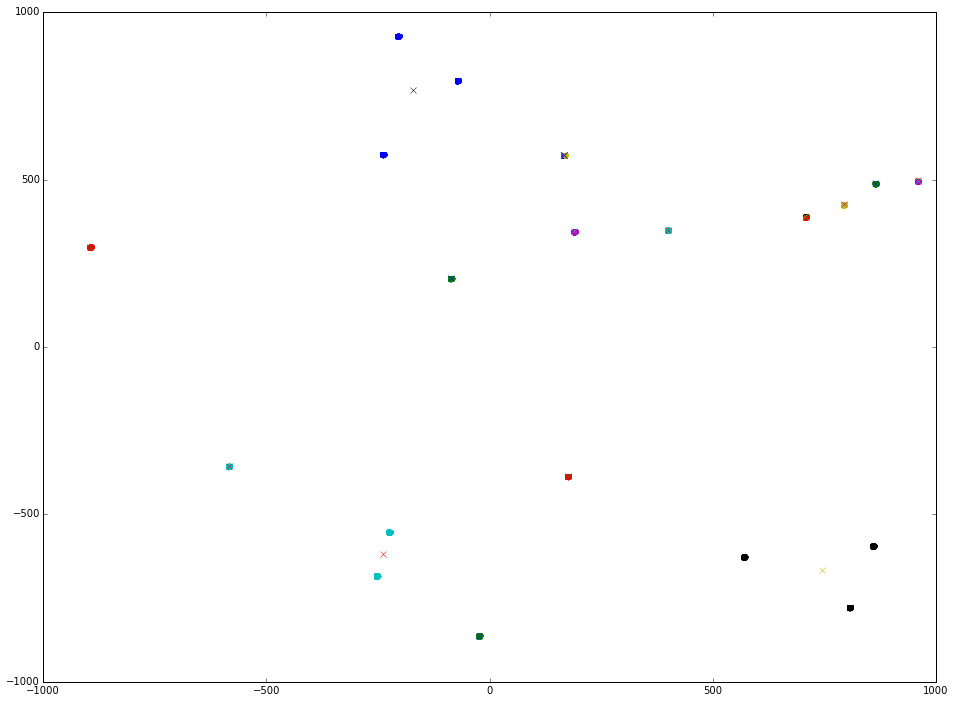

In [119]:
plt.figure(figsize=(16,12))
for c in grouperCUDA.partition:
    plt.plot(data[c,0],data[c,1],'.')
for c in grouperCUDA.centroids:
    plt.plot(c[0],c[1],'x')